<a href="https://colab.research.google.com/github/vvrgit/ML-Models-and-Applications/blob/main/LogisticlRegression_AITrack_SampleData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

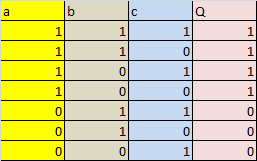

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import required libraries

In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

#Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata_04.csv')
data.head()

,a,b,c,Q
0,1,1,1,1
1,1,1,0,1
2,1,0,1,1
3,1,0,0,1
4,0,1,1,0


#Outliers Detection

In [4]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [5]:
sample_outliers_a = detect_outliers_zscore(data['a'])
sample_outliers_b = detect_outliers_zscore(data['b'])
sample_outliers_c = detect_outliers_zscore(data['c'])
sample_outliers_Q = detect_outliers_zscore(data['Q'])

print("Outliers in a column from Z-scores method: ", sample_outliers_a)
print("Outliers in b column from Z-scores method: ", sample_outliers_b)
print("Outliers in c column from Z-scores method: ", sample_outliers_c)
print("Outliers in e column from Z-scores method: ", sample_outliers_Q)

Outliers in a column from Z-scores method:  []
Outliers in b column from Z-scores method:  []
Outliers in c column from Z-scores method:  []
Outliers in e column from Z-scores method:  []


# Outlier Detection and Treatment

In [6]:
from scipy.stats import zscore
za = np.abs(zscore(data['a']))
zb = np.abs(zscore(data['b']))
zc = np.abs(zscore(data['c']))
zQ = np.abs(zscore(data['Q']))

data['Zscorea'] = za
data['Zscoreb'] = zb
data['Zscorec'] = zc
data['ZscoreQ'] = zQ

outliers_a=len(data[data['Zscorea']>3])
outliers_b=len(data[data['Zscoreb']>3])
outliers_c=len(data[data['Zscorec']>3])
outliers_Q=len(data[data['ZscoreQ']>3])

data_z = data[data['Zscorea']<3]
data_z = data[data['Zscoreb']<3]
data_z = data[data['Zscorec']<3]
data_z = data[data['ZscoreQ']<3]

data=data_z.drop(['Zscorea', 'Zscoreb','Zscorec', 'ZscoreQ'], axis=1)
data

,a,b,c,Q
0,1,1,1,1
1,1,1,0,1
2,1,0,1,1
3,1,0,0,1
4,0,1,1,0
5,0,1,0,0
6,0,0,1,0


# Missing Values Detection and Treatment

In [7]:
print(data.isnull().sum())

a    0
b    0
c    0
Q    0
dtype: int64


In [8]:
m1=data['a'].mean()
m2=data['b'].mean()
m3=data['c'].mean()
m5=data['Q'].mean()

data['a'].fillna(value=m1, inplace=True)
data['b'].fillna(value=m2, inplace=True)
data['c'].fillna(value=m3, inplace=True)
data['Q'].fillna(value=m5, inplace=True)

data

<ipython-input-8-992114bbd26f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['a'].fillna(value=m1, inplace=True)
<ipython-input-8-992114bbd26f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

,a,b,c,Q
0,1,1,1,1
1,1,1,0,1
2,1,0,1,1
3,1,0,0,1
4,0,1,1,0
5,0,1,0,0
6,0,0,1,0


# Data Split

In [9]:
from sklearn.model_selection import train_test_split
dataframe = data.values
X, y = dataframe[:, :-1], dataframe[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
x_train

array([[1, 1, 1],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [1, 1, 0]])

#Initialization

In [10]:
w1=random.uniform(-10,10)
w2=random.uniform(-10,10)
w3=random.uniform(-10,10)
bias=random.uniform(-10,10)
eta=0.01
max_iter=100000

# Model Training Using Stochastic Gradient Descent Algorithm

In [11]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    net=w1*x_train[sample,0]+w2*x_train[sample,1]+w3*x_train[sample,2]+bias
    p=1/(1+mt.exp(-net))
    w1=w1-eta*x_train[sample,0]*(p-y_train[sample])
    w2=w2-eta*x_train[sample,1]*(p-y_train[sample])
    w3=w3-eta*x_train[sample,2]*(p-y_train[sample])
    bias=bias-eta*(p-y_train[sample])
print('model parameter w1,w2,w3 and bias',w1,w2,w3,bias)

model parameter w1,w2,w3 and bias 13.583493948871466 -10.413856860499516 -0.21336687777286875 3.839951115050006


# Prediction on training data

In [12]:
y_pred_train = []
for sample in range(x_train.shape[0]):
  x1=x_train[sample,0]
  x2=x_train[sample,1]
  x3=x_train[sample,2]
  y=y_train[sample]
  net=w1*x_train[sample,0]+w2*x_train[sample,1]+w3*x_train[sample,2]+bias
  y_p_tr = np.round(1/(1+mt.exp(-net)))
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [13]:
y_pred_train

array([1., 1., 0., 0., 1.])

# Prediction on testing data

In [14]:
y_train

array([1, 1, 0, 0, 1])

In [15]:
y_pred_test = []
for sample in range(x_test.shape[0]):
  x1=x_test[sample,0]
  x2=x_test[sample,1]
  x3=x_test[sample,1]
  y=y_test[sample]
  net=w1*x_test[sample,0]+w2*x_test[sample,1]+w3*x_test[sample,2]+bias
  y_p_te = np.round(1/(1+mt.exp(-net)))
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

# Accuracy of the model

In [16]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train, y_pred_train)
train_accuracy

1.0

In [17]:
test_accuracy=accuracy_score(y_test, y_pred_test)
test_accuracy

0.5

#Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

array([[2, 0],
       [0, 3]])

#Deployment

In [20]:
X1=input('enter coefficient of square term')
X2=input('enter coefficient of x term')
X3=input('enter constant')
Y=w1*float(X1)+w2*float(X2)+w3*float(X3)+bias
p=np.round(1/(1+mt.exp(-Y)))
if(p==1):
  print('It is a quadratic equation')
if(p==0):
  print('It is a not quadratic equation')


enter coefficient of square term1
enter coefficient of x term0
enter constant1
It is a quadratic equation


## Thank you